In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip -o /content/Dataset1-.zip -d /content/


Archive:  /content/Dataset1-.zip
   creating: /content/Dataset1-/
   creating: /content/Dataset1-/Dataset1/
   creating: /content/Dataset1-/Dataset1/iimages/
  inflating: /content/Dataset1-/Dataset1/iimages/1.jpg  
  inflating: /content/Dataset1-/Dataset1/iimages/10.jpg  
  inflating: /content/Dataset1-/Dataset1/iimages/11.jpg  
  inflating: /content/Dataset1-/Dataset1/iimages/12.jpg  
  inflating: /content/Dataset1-/Dataset1/iimages/13.jpg  
  inflating: /content/Dataset1-/Dataset1/iimages/14.jpg  
  inflating: /content/Dataset1-/Dataset1/iimages/15.jpg  
  inflating: /content/Dataset1-/Dataset1/iimages/16.jpg  
  inflating: /content/Dataset1-/Dataset1/iimages/17.jpg  
  inflating: /content/Dataset1-/Dataset1/iimages/18.jpg  
  inflating: /content/Dataset1-/Dataset1/iimages/19.jpg  
  inflating: /content/Dataset1-/Dataset1/iimages/2.jpg  
  inflating: /content/Dataset1-/Dataset1/iimages/20.jpg  
  inflating: /content/Dataset1-/Dataset1/iimages/21.jpg  
  inflating: /content/Dataset1-/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import sys
from PIL import Image

In [ ]:
masks = glob.glob("/content/Dataset1-/Dataset1/mmasks/*jpg")


In [ ]:
masks=sorted(masks)

In [ ]:
orgs = glob.glob("/content/Dataset1-/Dataset1/iimages/*jpg")

In [ ]:
orgs = glob.glob("/content/Dataset1-/Dataset1/iimages/*jpg")


In [ ]:
orgs=sorted(orgs)

import cv2

In [ ]:
imgs_list = []
masks_list = []
for image, mask in zip(orgs, masks):

    print(image)
    print(mask)
    imgs_list.append(np.array(Image.open(image).resize((128,128))))

    im = Image.open(mask).resize((128,128))

    # bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)


    #im_cropped = im.crop((left, top, right, bottom))
    masks_list.append(np.array(im))

imgs_np = np.asarray(imgs_list)
masks_np = np.asarray(masks_list)

/content/Dataset1-/Dataset1/iimages/1.jpg
/content/Dataset1-/Dataset1/mmasks/1.jpg
/content/Dataset1-/Dataset1/iimages/10.jpg
/content/Dataset1-/Dataset1/mmasks/10.jpg
/content/Dataset1-/Dataset1/iimages/11.jpg
/content/Dataset1-/Dataset1/mmasks/11.jpg
/content/Dataset1-/Dataset1/iimages/12.jpg
/content/Dataset1-/Dataset1/mmasks/12.jpg
/content/Dataset1-/Dataset1/iimages/13.jpg
/content/Dataset1-/Dataset1/mmasks/13.jpg
/content/Dataset1-/Dataset1/iimages/14.jpg
/content/Dataset1-/Dataset1/mmasks/14.jpg
/content/Dataset1-/Dataset1/iimages/15.jpg
/content/Dataset1-/Dataset1/mmasks/15.jpg
/content/Dataset1-/Dataset1/iimages/16.jpg
/content/Dataset1-/Dataset1/mmasks/16.jpg
/content/Dataset1-/Dataset1/iimages/17.jpg
/content/Dataset1-/Dataset1/mmasks/17.jpg
/content/Dataset1-/Dataset1/iimages/18.jpg
/content/Dataset1-/Dataset1/mmasks/18.jpg
/content/Dataset1-/Dataset1/iimages/19.jpg
/content/Dataset1-/Dataset1/mmasks/19.jpg
/content/Dataset1-/Dataset1/iimages/2.jpg
/content/Dataset1-/Datase

In [ ]:
print(imgs_np.shape, masks_np.shape)

(80, 128, 128) (80, 128, 128)


In [ ]:
pip install -U albumentations


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.4/369.4 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 2.0.7
    Uninstalling albumentations-2.0.7:
      Successfully uninstalled albumentations-2.0.7


In [ ]:
import albumentations as A
import cv2

transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])
transformed = transform(image=imgs_np, mask=masks_np)
transformed_image = transformed['image']
transformed_mask = transformed['mask']

In [ ]:
imgs_np1=np.concatenate([imgs_np,transformed_image],axis=0)
masks_np1=np.concatenate([masks_np,transformed_mask],axis=0)


In [ ]:
np.array(imgs_np1).shape

(160, 128, 128)

In [ ]:
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Seeding
seed = 2021
random.seed = seed
np.random.seed = seed
tf.seed = seed

In [ ]:


from tensorflow import keras
from tensorflow.keras import layers

def down_block(x, filters, kernel_size=(3, 3, 3), padding="same", strides=1):
    """Downsampling block for 3D U-Net"""
    c = layers.Conv3D(filters, kernel_size, padding=padding, activation="relu")(x)
    c = layers.Conv3D(filters, kernel_size, padding=padding, activation="relu")(c)
    p = layers.MaxPooling3D((2, 2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3, 3), padding="same"):
    """Upsampling block for 3D U-Net"""
    u = layers.UpSampling3D((2, 2, 2))(x)
    u = layers.Conv3D(filters, kernel_size, padding=padding, activation="relu")(u)
    u = layers.Concatenate()([u, skip])
    u = layers.Conv3D(filters, kernel_size, padding=padding, activation="relu")(u)
    return u

def bottleneck(x, filters, kernel_size=(3, 3, 3), padding="same"):
    """Bottleneck layer of 3D U-Net"""
    c = layers.Conv3D(filters, kernel_size, padding=padding, activation="relu")(x)
    c = layers.Conv3D(filters, kernel_size, padding=padding, activation="relu")(c)
    return c

def UNet3D(image_size=128):
    """3D U-Net Model"""
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size, image_size, 1))  # Adding depth dimension

    p0 = inputs
    c1, p1 = down_block(p0, f[0])  # 128 -> 64
    c2, p2 = down_block(p1, f[1])  # 64 -> 32
    c3, p3 = down_block(p2, f[2])  # 32 -> 16
    c4, p4 = down_block(p3, f[3])  # 16 -> 8

    bn = bottleneck(p4, f[4])  # Bottleneck

    u1 = up_block(bn, c4, f[3])  # 8 -> 16
    u2 = up_block(u1, c3, f[2])  # 16 -> 32
    u3 = up_block(u2, c2, f[1])  # 32 -> 64
    u4 = up_block(u3, c1, f[0])  # 64 -> 128

    outputs = keras.layers.Conv3D(1, (1, 1, 1), padding="same", activation="sigmoid")(u4)

    model = keras.models.Model(inputs, outputs)
    return model

# Compile the 3D U-Net model
model = UNet3D()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()

image_size=128



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 1)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 128, 128,  │        448 │ input_layer[0][0] │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 128, 128,  │      6,928 │ conv3d[0][0]      │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d       │ (None, 64, 64,    │          0 │ conv3d_1[0][0]    │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 64, 64,    │     13,856 │ max_pooling3d[0]… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_3 (Conv3D)   │ (None, 64, 64,    │     27,680 │ conv3d_2[0][0]    │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_1     │ (None, 32, 32,    │          0 │ conv3d_3[0][0]    │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_4 (Conv3D)   │ (None, 32, 32,    │     55,360 │ max_pooling3d_1[… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_5 (Conv3D)   │ (None, 32, 32,    │    110,656 │ conv3d_4[0][0]    │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_2     │ (None, 16, 16,    │          0 │ conv3d_5[0][0]    │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_6 (Conv3D)   │ (None, 16, 16,    │    221,312 │ max_pooling3d_2[… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_7 (Conv3D)   │ (None, 16, 16,    │    442,496 │ conv3d_6[0][0]    │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_3     │ (None, 8, 8, 8,   │          0 │ conv3d_7[0][0]    │
│ (MaxPooling3D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_8 (Conv3D)   │ (None, 8, 8, 8,   │    884,992 │ max_pooling3d_3[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_9 (Conv3D)   │ (None, 8, 8, 8,   │  1,769,728 │ conv3d_8[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling3d       │ (None, 16, 16,    │          0 │ conv3d_9[0][0]    │
│ (UpSampling3D)      │ 16, 256)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_10 (Conv3D)  │ (None, 16, 16,    │    884,864 │ up_sampling3d[0]

 Total params: 5,884,033 (22.45 MB)

 Trainable params: 5,884,033 (22.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
imgs_list = []
masks_list = []
for image, mask in zip(orgs, masks):

    print(image)
    print(mask)
    imgs_list.append(np.array(Image.open(image).resize((512,512))))

    im = Image.open(mask).resize((512,512))

    # bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)


    #im_cropped = im.crop((left, top, right, bottom))
    masks_list.append(np.array(im))

imgs_np = np.asarray(imgs_list)
masks_np = np.asarray(masks_list)

/content/Dataset1-/Dataset1/iimages/1.jpg
/content/Dataset1-/Dataset1/mmasks/1.jpg
/content/Dataset1-/Dataset1/iimages/10.jpg
/content/Dataset1-/Dataset1/mmasks/10.jpg
/content/Dataset1-/Dataset1/iimages/11.jpg
/content/Dataset1-/Dataset1/mmasks/11.jpg
/content/Dataset1-/Dataset1/iimages/12.jpg
/content/Dataset1-/Dataset1/mmasks/12.jpg
/content/Dataset1-/Dataset1/iimages/13.jpg
/content/Dataset1-/Dataset1/mmasks/13.jpg
/content/Dataset1-/Dataset1/iimages/14.jpg
/content/Dataset1-/Dataset1/mmasks/14.jpg
/content/Dataset1-/Dataset1/iimages/15.jpg
/content/Dataset1-/Dataset1/mmasks/15.jpg
/content/Dataset1-/Dataset1/iimages/16.jpg
/content/Dataset1-/Dataset1/mmasks/16.jpg
/content/Dataset1-/Dataset1/iimages/17.jpg
/content/Dataset1-/Dataset1/mmasks/17.jpg
/content/Dataset1-/Dataset1/iimages/18.jpg
/content/Dataset1-/Dataset1/mmasks/18.jpg
/content/Dataset1-/Dataset1/iimages/19.jpg
/content/Dataset1-/Dataset1/mmasks/19.jpg
/content/Dataset1-/Dataset1/iimages/2.jpg
/content/Dataset1-/Datase

In [ ]:
print(imgs_np.shape, masks_np.shape)

(80, 512, 512) (80, 512, 512)


In [ ]:
import albumentations as A
import cv2

transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])
transformed = transform(image=imgs_np, mask=masks_np)
transformed_image = transformed['image']
transformed_mask = transformed['mask']

In [ ]:
imgs_np1=np.concatenate([imgs_np,transformed_image],axis=0)
masks_np1=np.concatenate([masks_np,transformed_mask],axis=0)


In [ ]:
np.array(imgs_np1).shape

(160, 512, 512)

In [ ]:
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Seeding
seed = 2021
random.seed = seed
np.random.seed = seed
tf.seed = seed

In [ ]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [ ]:
image_size=512

In [ ]:
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size, 1))

    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    c4, p4 = down_block(p3, f[3]) #16->8

    bn = bottleneck(p4, f[4])

    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128

    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


# opt = keras.optimizers.Adam(learning_rate=0.01)
# model.compile(loss='categorical_crossentropy', optimizer=opt)

model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 512, 512,  │        160 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 512, 512,  │      2,320 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 256, 256,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 256, 256,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 256, 256,  │      9,248 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 128, 128,  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 64, 64,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 32, 32,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_3[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 32,    │    590,080 │ conv2d_8[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 64, 64,    │          0 │ conv2d_9[0][0]    │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 64, 64,    │          0 │ up_sampling2d[0]

 Total params: 1,962,337 (7.49 MB)

 Trainable params: 1,962,337 (7.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
pip install pydot pydotplus graphviz


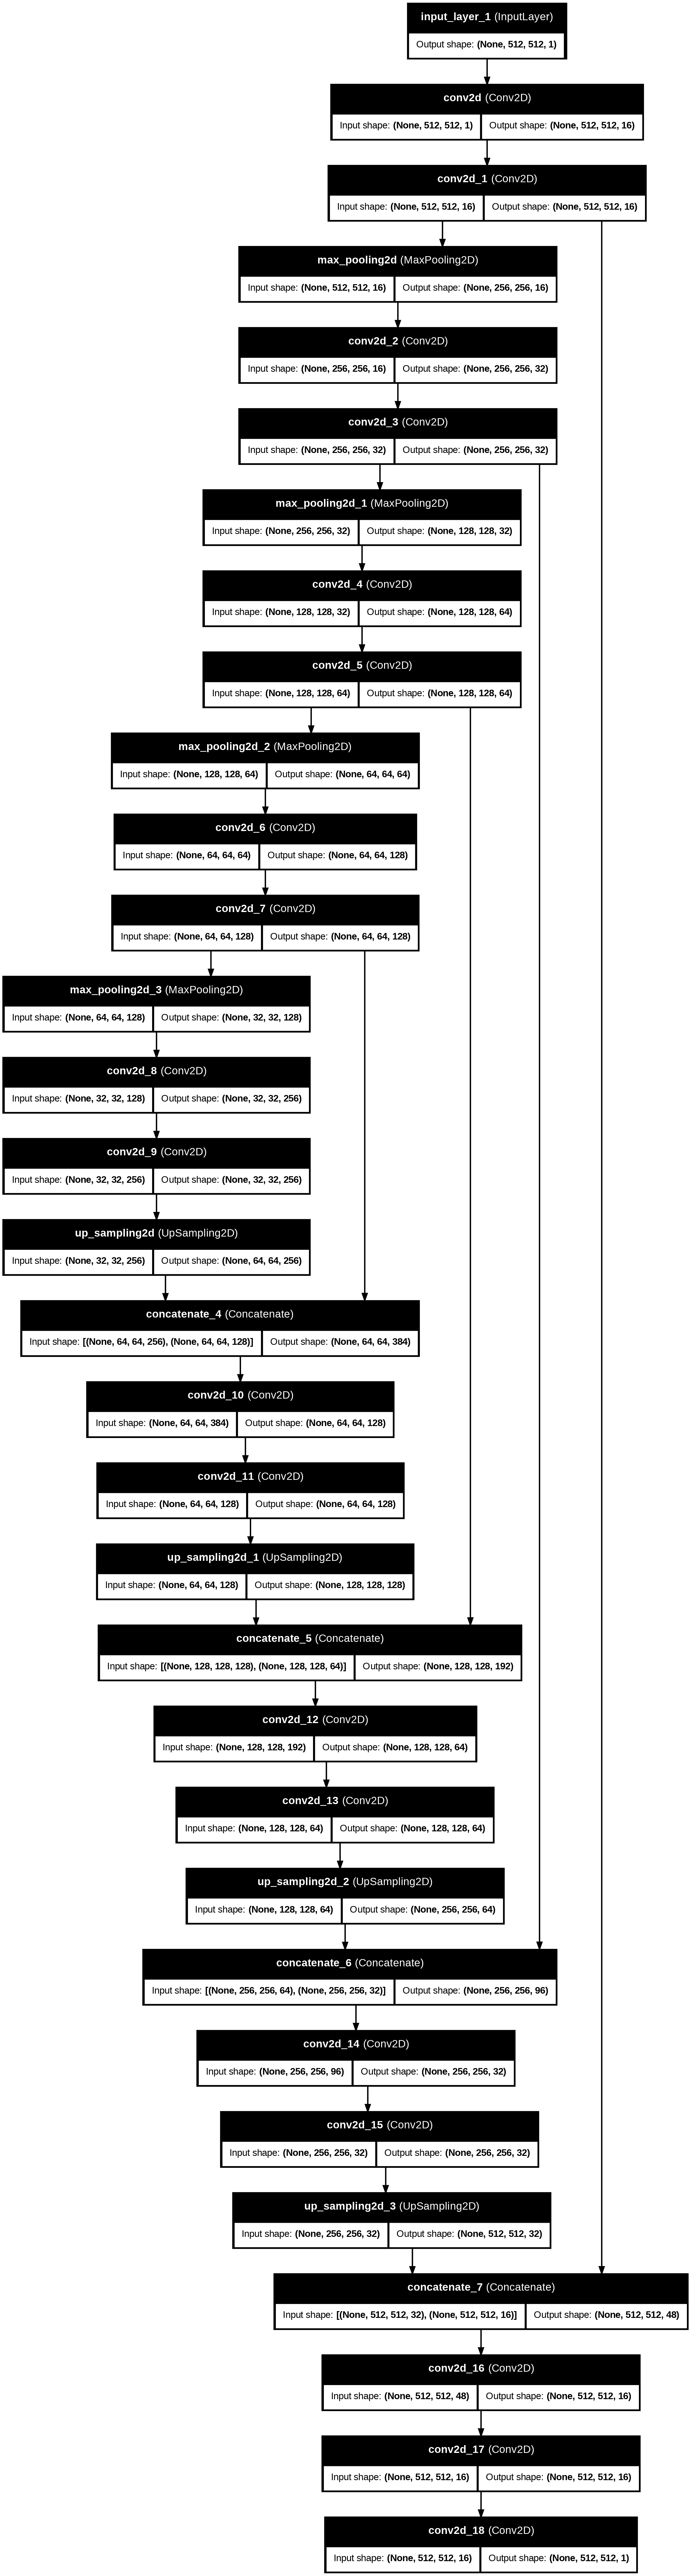

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file="3Dunet_model-.png", show_shapes=True, show_layer_names=True)


In [ ]:
x = np.asarray(imgs_np1, dtype=np.float32)/255
y = np.asarray(masks_np1, dtype=np.float32)/255

In [ ]:
y = y.reshape(y.shape[0], y.shape[1], y.shape[2], 1)
print(x.shape, y.shape)

(160, 512, 512) (160, 512, 512, 1)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (128, 512, 512)
y_train:  (128, 512, 512, 1)
x_val:  (32, 512, 512)
y_val:  (32, 512, 512, 1)


In [ ]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 512, 512,  │        160 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 512, 512,  │      2,320 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 256, 256,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 256, 256,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 256, 256,  │      9,248 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 128, 128,  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 64, 64,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 32, 32,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_3[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 32,    │    590,080 │ conv2d_8[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 64, 64,    │          0 │ conv2d_9[0][0]    │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 64, 64,    │          0 │ up_sampling2d[0]

 Total params: 1,962,337 (7.49 MB)

 Trainable params: 1,962,337 (7.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size, 1))

    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    c4, p4 = down_block(p3, f[3]) #16->8

    bn = bottleneck(p4, f[4])

    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128

    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model # Added return statement here

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


# opt = keras.optimizers.Adam(learning_rate=0.01)
# model.compile(loss='categorical_crossentropy', optimizer=opt)

model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 512, 512,  │        160 │ input_layer_2[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 512, 512,  │      2,320 │ conv2d_19[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 256, 256,  │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 256, 256,  │      4,640 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 256, 256,  │      9,248 │ conv2d_21[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 128, 128,  │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 128, 128,  │     18,496 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_23[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 64, 64,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_25[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 32, 32,    │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 32, 32,    │    295,168 │ max_pooling2d_7[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 32, 32,    │    590,080 │ conv2d_27[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_4     │ (None, 64, 64,    │          0 │ conv2d_28[0][0]   │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 64, 64,    │          0 │ up_sampling2d_4[

 Total params: 1,962,337 (7.49 MB)

 Trainable params: 1,962,337 (7.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
outs=model.fit(x_train,y_train,validation_data=(x_val,y_val),steps_per_epoch=10,epochs=30)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 470s 47s/step - acc: 0.7098 - loss: 0.6060 - val_acc: 0.9687 - val_loss: 0.1995
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 479s 44s/step - acc: 0.9651 - loss: 0.1475 - val_acc: 0.9687 - val_loss: 0.0788
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 452s 45s/step - acc: 0.9647 - loss: 0.0837 - val_acc: 0.9687 - val_loss: 0.0579
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 505s 45s/step - acc: 0.9654 - loss: 0.0637 - val_acc: 0.9687 - val_loss: 0.0557
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 506s 46s/step - acc: 0.9654 - loss: 0.0597 - val_acc: 0.9687 - val_loss: 0.0492
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 501s 46s/step - acc: 0.9644 - loss: 0.0587 - val_acc: 0.9687 - val_loss: 0.0519
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 500s 46s/step - acc: 0.9658 - loss: 0.0565 - val_acc: 0.9687 - val_loss: 0.0468
Epoch 8/30
 4/10 ━━━━━━━━━━━━━━━━━━━━ 4:04 41s/step - acc: 0.9669 - loss: 0.0533

In [ ]:

accuracy = [
    0.6257, 0.9680, 0.9660, 0.9638, 0.9646, 0.9648, 0.9638, 0.9664, 0.9650, 0.9658,
    0.9653, 0.9663, 0.9676, 0.9658, 0.9670, 0.9642, 0.9652, 0.9672, 0.9663, 0.9646,
    0.9658, 0.9668, 0.9641, 0.9648, 0.9681, 0.9709, 0.9701, 0.9709, 0.9714, 0.9706
]

loss = [
    0.6086, 0.1466, 0.0747, 0.0681, 0.0638, 0.0623, 0.0613, 0.0547, 0.0523, 0.0560,
    0.0489, 0.0467, 0.0405, 0.0402, 0.0340, 0.0303, 0.0355, 0.0307, 0.0297, 0.0277,
    0.0249, 0.0292, 0.0281, 0.0266, 0.0225, 0.0189, 0.0237, 0.0187, 0.0144, 0.0149
]

val_accuracy = [
    0.9687, 0.9687, 0.9687, 0.9687, 0.9687, 0.9687, 0.9687, 0.9687, 0.9687, 0.9687,
    0.9687, 0.9687, 0.9687, 0.9687, 0.9687, 0.9687, 0.9687, 0.9687, 0.9687, 0.9687,
    0.9687, 0.9687, 0.9687, 0.9694, 0.9726, 0.9701, 0.9726, 0.9730, 0.9731, 0.9730
]

val_loss = [
    0.2047, 0.0674, 0.0577, 0.0573, 0.0551, 0.0554, 0.0505, 0.0455, 0.0476, 0.0423,
    0.0382, 0.0386, 0.0361, 0.0317, 0.0276, 0.0306, 0.0265, 0.0255, 0.0255, 0.0228,
    0.0283, 0.0230, 0.0228, 0.0215, 0.0195, 0.0246, 0.0185, 0.0143, 0.0132, 0.0130
]


mean_acc = sum(accuracy) / len(accuracy)
mean_loss = sum(loss) / len(loss)
mean_val_acc = sum(val_accuracy) / len(val_accuracy)
mean_val_loss = sum(val_loss) / len(val_loss)


print(f"Mean Accuracy: {mean_acc:.4f}")
print(f"Mean Loss: {mean_loss:.4f}")
print(f"Mean Validation Accuracy: {mean_val_acc:.4f}")
print(f"Mean Validation Loss: {mean_val_loss:.4f}")


Mean Accuracy: 0.9552
Mean Loss: 0.0611
Mean Validation Accuracy: 0.9695
Mean Validation Loss: 0.0395


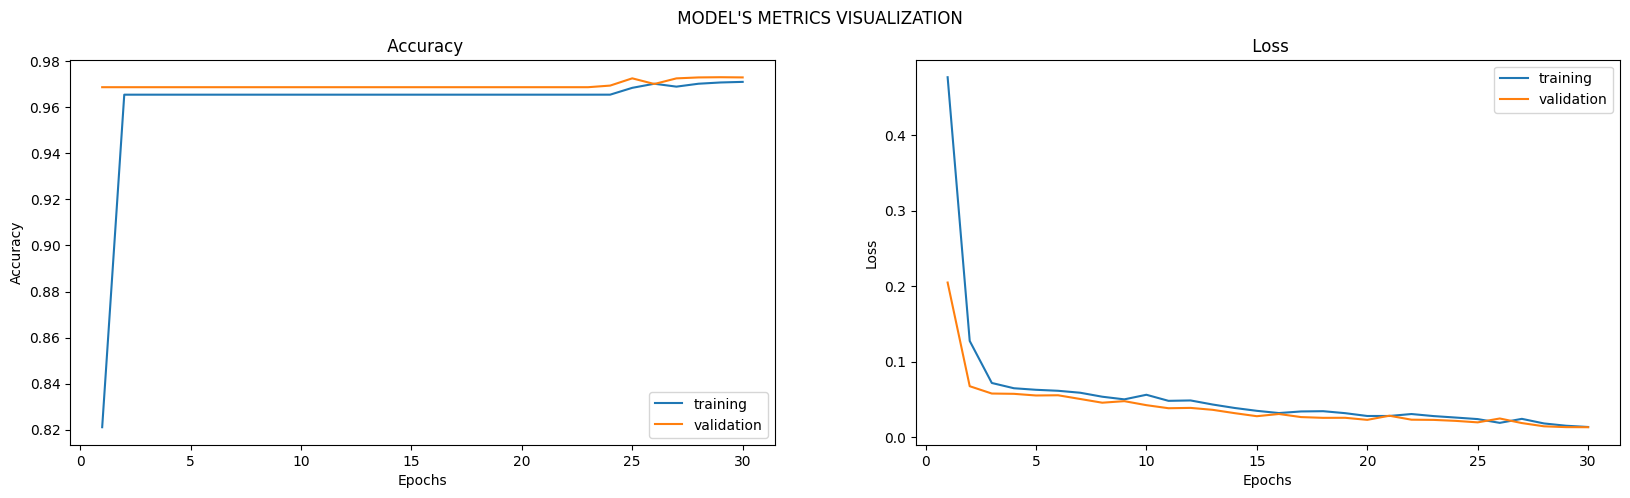

In [ ]:
hs=outs.history

acc = hs['acc']
val_acc = hs['val_acc']
loss =  hs['loss']
val_loss = hs['val_loss']


fig, (ax1, ax2) = plt.subplots(1,2, figsize= (20,5))
fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

ax1.plot(range(1, len(acc) + 1), acc)
ax1.plot(range(1, len(val_acc) + 1), val_acc)
ax1.set_title(' Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(['training', 'validation'])


ax2.plot(range(1, len(loss) + 1), loss)
ax2.plot(range(1, len(val_loss) + 1), val_loss)
ax2.set_title(' Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(['training', 'validation'])


plt.show()

In [ ]:

input_shape = x_train[0].shape
input_shape


(512, 512)

In [ ]:
y_val[1].shape

(512, 512, 1)

In [ ]:
result = model.predict(x_train)


4/4 ━━━━━━━━━━━━━━━━━━━━ 112s 27s/step


In [ ]:
model

<Functional name=functional_2, built=True>

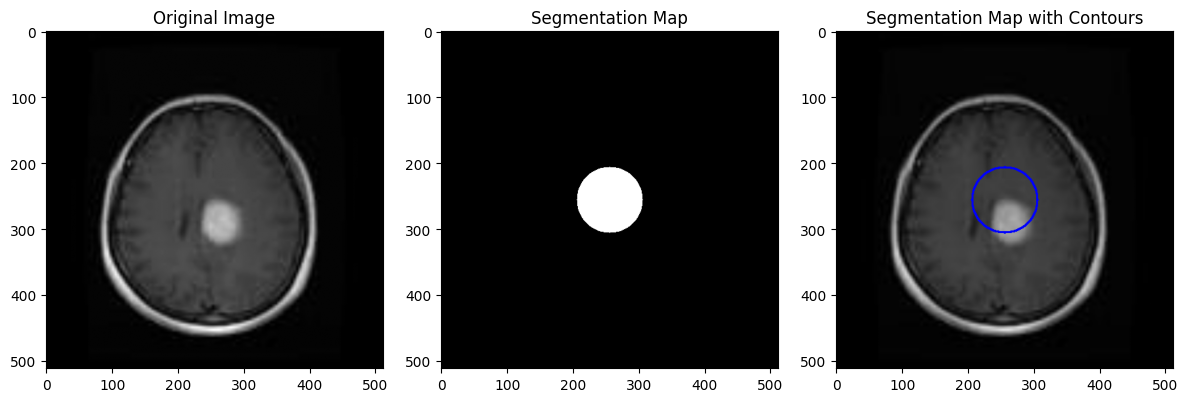

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the original image
original_image = cv2.imread('/content/Dataset1-/Dataset1/iimages/10.jpg', cv2.IMREAD_GRAYSCALE)

# Resize for consistency (if required)
original_image = cv2.resize(original_image, (512, 512))

# Assuming segmentation is a binary mask of the same size
# For demonstration, let's create a synthetic mask
segmentation_map = np.zeros_like(original_image)
cv2.circle(segmentation_map, (256, 256), 50, 255, -1)  # A white circle as a sample mask

# Find contours for overlay
contours, _ = cv2.findContours(segmentation_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy to overlay contours
overlay_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(overlay_image, contours, -1, (0, 0, 255), 2)  # Red contour

# Plotting the images side by side
plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('on')

# Segmentation Map
plt.subplot(1, 3, 2)
plt.imshow(segmentation_map, cmap='gray')
plt.title("Segmentation Map")
plt.axis('on')

# Segmentation Map with Contours
plt.subplot(1, 3, 3)
plt.imshow(overlay_image)
plt.title("Segmentation Map with Contours")
plt.axis('on')

# Display all
plt.tight_layout()
plt.show()


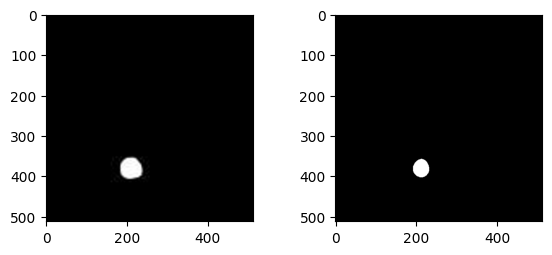

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y_train[10]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[10]>0.2, (image_size, image_size)), cmap="gray")

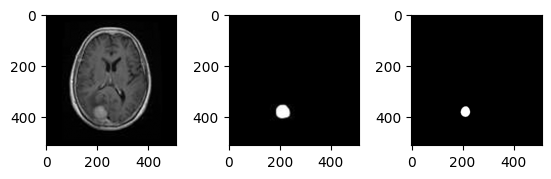

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)
ax.imshow(np.reshape(x_train[10]*255, (image_size, image_size)), cmap="gray")


ax = fig.add_subplot(1, 3, 2)
ax.imshow(np.reshape(y_train[10]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 3, 3)
ax.imshow(np.reshape((result[10]>0.3), (image_size, image_size)), cmap="gray")
